In [ ]:
pip install yfinance

In [2]:
import yfinance as yf
import pandas as pd

ticker_symbol = "TSLA"

tesla = yf.Ticker(ticker_symbol)

stock_data = tesla.history(period="5y")

print("Tesla Stock Data (5-Year Historical):")
print(stock_data.head())

stock_data.to_csv(f"{ticker_symbol}_stock_data.csv")


Tesla Stock Data (5-Year Historical):
                                Open       High        Low      Close  \
Date                                                                    
2020-01-21 00:00:00-05:00  35.349998  36.571999  35.227333  36.480000   
2020-01-22 00:00:00-05:00  38.125999  39.633331  37.273335  37.970669   
2020-01-23 00:00:00-05:00  37.616669  38.799999  37.040001  38.146667   
2020-01-24 00:00:00-05:00  38.042000  38.257332  36.950668  37.654667   
2020-01-27 00:00:00-05:00  36.132668  37.629333  35.952000  37.201332   

                              Volume  Dividends  Stock Splits  
Date                                                           
2020-01-21 00:00:00-05:00  267052500        0.0           0.0  
2020-01-22 00:00:00-05:00  470535000        0.0           0.0  
2020-01-23 00:00:00-05:00  294765000        0.0           0.0  
2020-01-24 00:00:00-05:00  215304000        0.0           0.0  
2020-01-27 00:00:00-05:00  204121500        0.0           0.0  


In [1]:
import yfinance as yf

# Fetch Tesla financial data
tesla = yf.Ticker("TSLA")

# Extract quarterly financial data
financials = tesla.quarterly_financials

# Extract the revenue row
revenue_data = financials.loc["Total Revenue"]
print(revenue_data)


2024-09-30    25182000000.0
2024-06-30    25500000000.0
2024-03-31    21301000000.0
2023-12-31    25167000000.0
2023-09-30    23350000000.0
2023-06-30              NaN
Name: Total Revenue, dtype: object


                                 Open        High         Low       Close  \
Date                                                                        
2024-01-18 00:00:00-05:00  216.880005  217.449997  208.740005  211.880005   
2024-01-19 00:00:00-05:00  209.990005  213.190002  207.559998  212.190002   
2024-01-22 00:00:00-05:00  212.259995  217.800003  206.270004  208.800003   
2024-01-23 00:00:00-05:00  211.300003  215.649994  207.750000  209.139999   
2024-01-24 00:00:00-05:00  211.880005  212.729996  206.770004  207.830002   

                              Volume  Dividends  Stock Splits  
Date                                                           
2024-01-18 00:00:00-05:00  108595400        0.0           0.0  
2024-01-19 00:00:00-05:00  102095800        0.0           0.0  
2024-01-22 00:00:00-05:00  117952500        0.0           0.0  
2024-01-23 00:00:00-05:00  106605900        0.0           0.0  
2024-01-24 00:00:00-05:00  123369900        0.0           0.0  


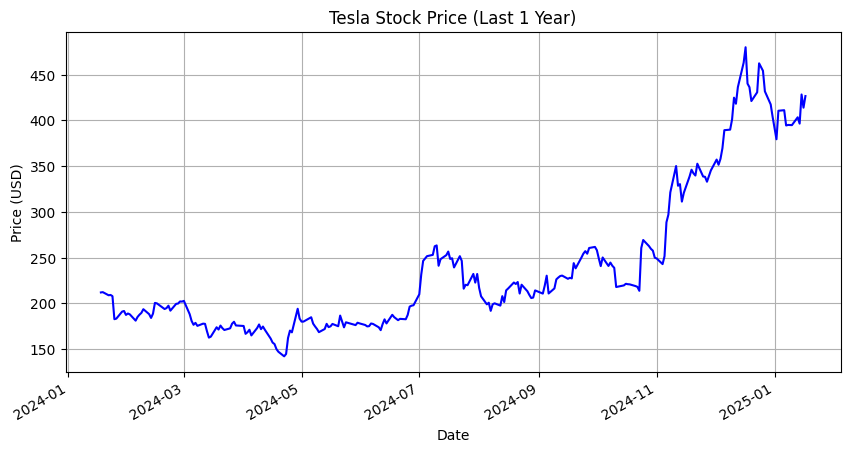

In [2]:
import yfinance as yf
import matplotlib.pyplot as plt
import pandas as pd

# Step 1: Fetch Tesla stock data using yfinance
tesla = yf.Ticker("TSLA")

# Get the historical stock data
stock_data = tesla.history(period="1y")  # Last year of data

# Display the first few rows of the stock data
print(stock_data.head())

# Plot Tesla stock price (Close price)
plt.figure(figsize=(10, 5))
stock_data['Close'].plot(title="Tesla Stock Price (Last 1 Year)", color='blue')
plt.xlabel('Date')
plt.ylabel('Price (USD)')
plt.grid(True)
plt.show()


2024-09-30    25182000000.0
2024-06-30    25500000000.0
2024-03-31    21301000000.0
2023-12-31    25167000000.0
2023-09-30    23350000000.0
2023-06-30              NaN
Name: Total Revenue, dtype: object


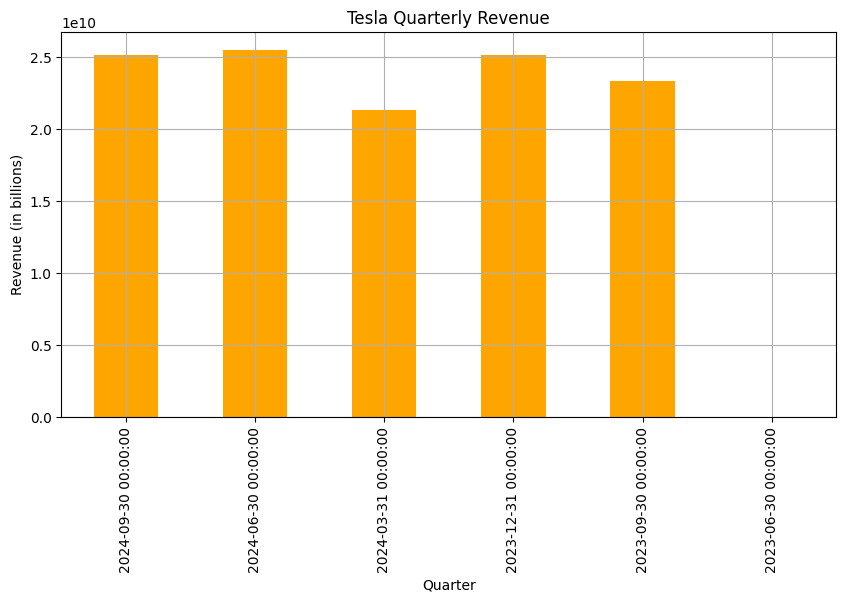

In [3]:
# Step 2: Fetch quarterly financials for Tesla using yfinance
financials = tesla.quarterly_financials

# Extract the 'Total Revenue' row
revenue_data = financials.loc['Total Revenue']

# Display the revenue data
print(revenue_data)

# Plot the revenue data
plt.figure(figsize=(10, 5))
revenue_data.plot(kind='bar', title="Tesla Quarterly Revenue", color='orange')
plt.xlabel('Quarter')
plt.ylabel('Revenue (in billions)')
plt.grid(True)
plt.show()


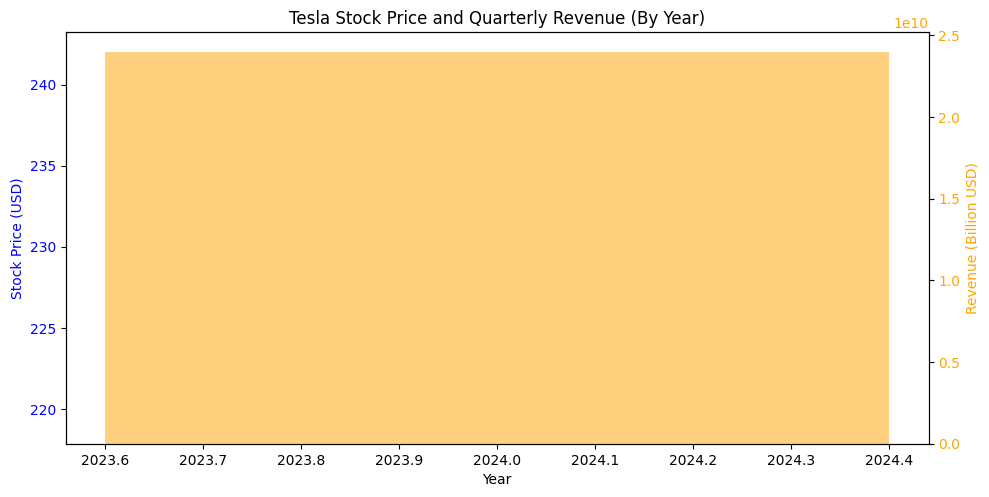

In [10]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming you already have 'stock_data' and 'revenue_data' prepared

# Convert revenue data to a DataFrame
revenue_df = revenue_data.reset_index()
revenue_df.columns = ['Date', 'Revenue']
revenue_df['Date'] = pd.to_datetime(revenue_df['Date'])

# Prepare stock data (assuming it's already in 'stock_data')
stock_data['Year'] = stock_data.index.year

# Prepare revenue data (group by year)
revenue_df['Year'] = revenue_df['Date'].dt.year

# Merge stock and revenue data
merged_data = pd.merge(
    stock_data.groupby('Year').mean()['Close'], 
    revenue_df.groupby('Year').mean()['Revenue'], 
    left_index=True, right_on='Year'
)

# Define the make_graph function
def make_graph(stock_data, revenue_data):
    """
    Creates a dual-axis plot with stock prices and revenue data.
    
    Parameters:
    - stock_data: DataFrame with 'Year' as index and 'Close' price column
    - revenue_data: DataFrame with 'Year' as index and 'Revenue' column
    """
    # Create the figure and axis for the plot
    fig, ax1 = plt.subplots(figsize=(10, 5))
    
    # Plot stock price (on the left y-axis)
    ax1.set_xlabel('Year')
    ax1.set_ylabel('Stock Price (USD)', color='blue')
    ax1.plot(stock_data.index, stock_data['Close'], color='blue', label="Stock Price")
    ax1.tick_params(axis='y', labelcolor='blue')
    
    # Create a second y-axis to plot the revenue (on the right y-axis)
    ax2 = ax1.twinx()
    ax2.set_ylabel('Revenue (Billion USD)', color='orange')
    ax2.bar(revenue_data.index, revenue_data['Revenue'], color='orange', alpha=0.5, label="Revenue")
    ax2.tick_params(axis='y', labelcolor='orange')
    
    # Add title and show plot
    fig.tight_layout()
    plt.title("Tesla Stock Price and Quarterly Revenue (By Year)")
    plt.show()

# Call the make_graph function with the merged data
make_graph(merged_data[['Close']], merged_data[['Revenue']])
